# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question 

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative? 

In [10]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

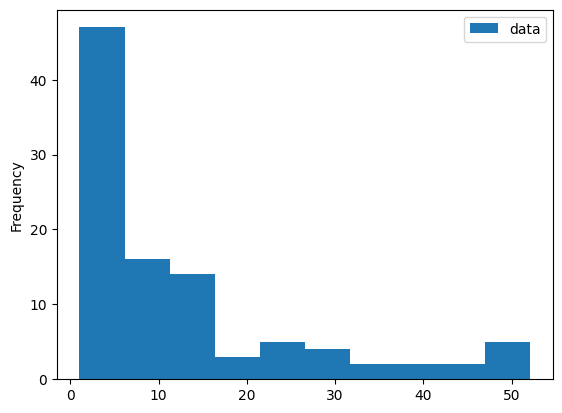

In [11]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

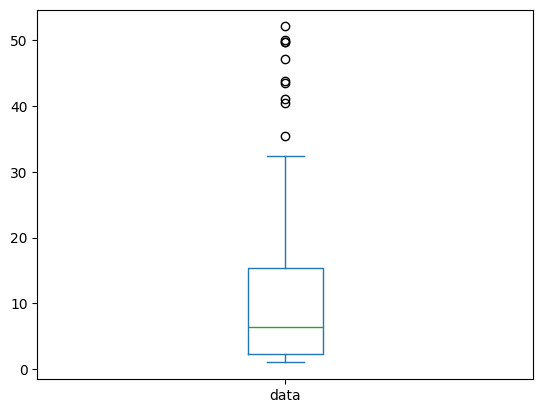

In [12]:
df.plot.box()

Histogram Pros:

It reveals the full shape of the distribution; where most prices lie, presence of multiple peaks, and spread.
It shows frequency counts, making it easy to understand how many drugs fall into each price range.

Cons:

The bins are too wide which can hide details; bins are too narrow and can introduce noise. 
It is difficult to identify exact statistical values like the 75th percentile or median just by looking at the bars.

Boxplot Pros:

Efficiently summarizes core distribution metrics. It displays the median, interquartile range, overall spread, and any outliers.
Instantly reveals skewness. It shows the position of the median within the box and the whisker lengths show asymmetry in the data.
It does great job comparing groups. Ideal for side‑by‑side analysis across categories—even though here we’re examining a single dataset. 

Cons: 

It hides the details of the distribution—no multimodal detection or exact shape you get from the histogram.
It might chellenging for some audiences to interprete quartiles and whiskers. 

I would choose a histogram to show general shape and where expensive drugs fall and perhaps use a boxplot beneath it to clearly mark quartiles, skew, and extreme values.

Modification to make it visually interesting: 

Stack the histogram above the boxplot, sharing the x-axis for easy comparison.
Use 5–10 bins.
Highlight the rightmost bin (highest prices) in a contrasting color like orange or red.
Label whiskers and median clearly on the boxplot.
Highlight outliers as red dots.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

# 4. Storytelling With Data graph 

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

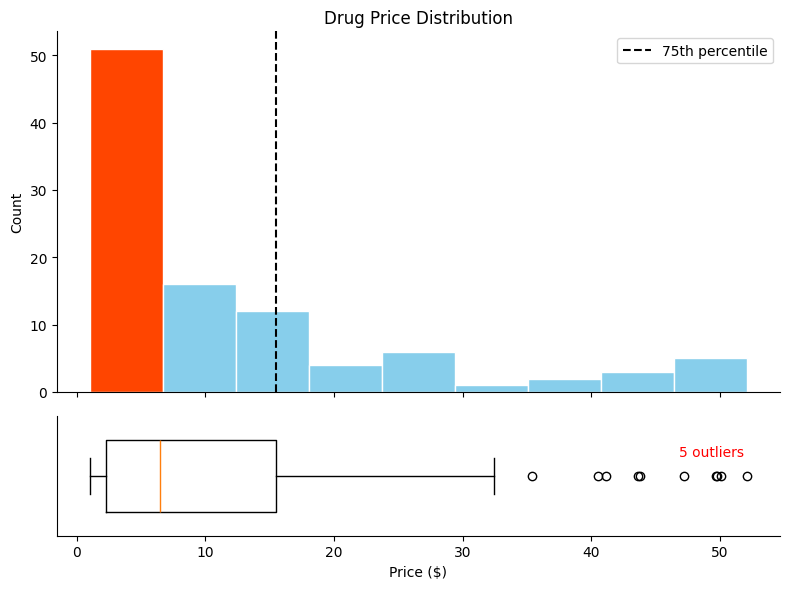

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
data = np.exp(np.random.uniform(0, 4, 100))
df = pd.DataFrame(data, columns=['price'])
fig, (ax_hist, ax_box) = plt.subplots(
    2, 1, figsize=(8, 6), sharex=True,
    gridspec_kw={'height_ratios': [3, 1]}
)
bins = np.histogram_bin_edges(df['price'], bins='fd')
counts, edges, patches = ax_hist.hist(
    df['price'], bins=bins, color='skyblue', edgecolor='white'
)
max_bin_index = np.argmax(counts)
for i, patch in enumerate(patches):
    if i == max_bin_index:
        patch.set_facecolor('orangered')
        pct75 = df['price'].quantile(0.75)
ax_hist.axvline(pct75, color='black', linestyle='--', label='75th percentile')
ax_hist.set_ylabel('Count')
ax_hist.legend()
ax_hist.set_title('Drug Price Distribution')
ax_box.boxplot(
    df['price'], vert=False, widths=0.6,
    flierprops={'marker': 'o', 'color': 'red'}
)
ax_box.set_yticks([])
ax_box.set_xlabel('Price ($)')
for ax in (ax_hist, ax_box):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    outliers = df['price'] > edges[-2]
num_outliers = outliers.sum()
ax_box.text(
    0.95, 0.7, f'{num_outliers} outliers', transform=ax_box.transAxes,
    ha='right', va='center', color='red'
)

plt.tight_layout()
plt.show() 